In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
dataset = "http://bit.ly/w-data"
df = pd.read_csv(dataset)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
sns.set(style='darkgrid')

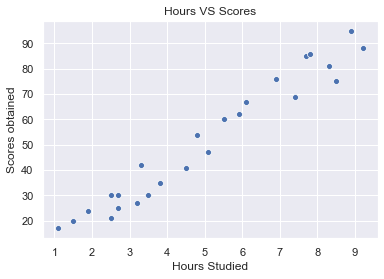

In [16]:
sns.scatterplot(data=df, x="Hours", y="Scores") 
plt.title("Hours VS Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores obtained")
plt.show()

In [17]:
#Data PreProcessing
X= df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

In [21]:
#Training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

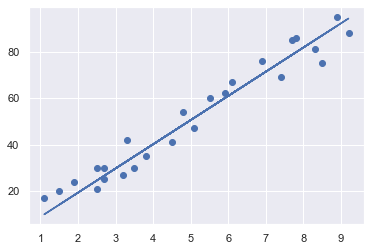

In [28]:
plt.scatter(X,y)
line = lr.coef_*X + lr.intercept_
plt.plot(X,line)

In [31]:
# Prediction using Trained Model
y_pred = lr.predict(X_test)
y_pred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [32]:
predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_data

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [33]:
# Testing for 9.5hrs as x-coefficient
hours = np.array([9.25])
pred = lr.predict(hours.reshape(-1,1))
print('Hours of study:{}'.format(hours))
print('Predicted Score of student:{}'.format(pred))

Hours of study:[9.25]
Predicted Score of student:[94.78722213]


In [44]:
# Checking the accuracy of the model
from sklearn import metrics
Mean_Error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean_Error = {}'.format(Mean_Error))


Mean_Error = 7.169048271425507
